#  Проверка гипотез по увеличению выручки в интернет-магазине

# Содержание

Часть 1. Описание проекта.<br>

* 1. Описание исследования.
* 2. Цель исследования.
* 3. Изучение предоставленных данных.

Часть 2. Приоритезация гипотез.<br>

* 1. Применение фреймворка ICE.
* 2. Применение фреймворка RICE.
* 3. Описание результатов.

Часть 3. Анализ А/В-теста.<br>

* 1. Анализ результатов проведенного А/В-теста.
* 2. Описание результатов.

Часть 4. Подведение итогов.<br>

* 1. Общий вывод по работе.

## Часть. Описание проекта
### Описание исследования

В распоряжении есть 3 датасета:
- предложенные гипотезы и их параметры для проведения приоритезации
- данные о заказах при проведении А/В-теста
- данные о посещениях пользователей при проведении А/В-теста.

### Цель исследования

Необходимо провести приоритезацию гипотез, а также провести анализ результатов А/В-теста.

### Изучение предоставленных данных

In [1]:
# Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

# Отключение ошибок при построении графиков
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
# Чтение файлов с данными
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# Функция для вывода основных данных по датасету
def all_info(data):
    print('Общая информация')
    data.info() #вывод общей информации
    display('Первые значения', data.head(5)) #вывод первых 10 значений
    display('Описание данных', data.describe()) #вывод описательной статистики по датасету
    display('Дубликаты', data.duplicated().sum()) #поиск явных дубликатов в данных
    print('*'*50)
    
# Применение функции к данным
all_info(hypothesis)
all_info(orders)
all_info(visitors)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


'Первые значения'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


'Описание данных'

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


'Дубликаты'

0

**************************************************
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'Первые значения'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'Описание данных'

,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


'Дубликаты'

0

**************************************************
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'Первые значения'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


'Описание данных'

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


'Дубликаты'

0

**************************************************


Данные во всех 3х датасетах не нуждаются в редактировании, возможно кроме наименований колонок, которые можно привести к нижнему регистру.

In [4]:
# Переименуем наименования колонок для удобства
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]
orders.columns = [x.lower() for x in orders.columns.values]
orders.rename(columns = {'transactionid': 'transaction_id', 'visitorid': 'visitor_id'},inplace=True)
visitors.columns = [x.lower() for x in visitors.columns.values]

In [5]:
# Доли посетителей по группам
percent = orders.groupby('group', as_index=False)['visitor_id'].count()
percent['visitor_id'] = percent['visitor_id'] / len(orders) * 100
percent

,group,visitor_id
0,A,46.53
1,B,53.47


**Вывод**

В данных отсутствуют дубликаты и пропуски.<br>
Кроме того по данным описательной статистики датасета orders предварительно можно сказать, что в данных присутствует аномально высокие значения (медиана = 8348, среднее = 39191).

## Часть. Приоритезация гипотез
### Применение фреймворка ICE

Фреймворк ICE рассчитывается следующим образом: $$ICE = \frac{Impact * Confidence}{Efforts}$$

In [6]:
# Добавление столбца с фреймворком ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis.sort_values('ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Применение фреймворка RICE

Фреймворк RICE рассчитывается следующим образом: $$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [7]:
# Добавление столбца с фреймворком RICE
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis.sort_values('RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


### Описание результатов

При применении фреймворка ICE мы не учитывали охват пользователей, соответственно топ-3 приоритетными гипотезами стали гипотезы под номерами 8, 0, 7.<br>
При применении фреймворка RICE мы учли охват пользователей, соответственно топ-3 приоритетными гипотезами стали гипотезы под номерами 7, 2, 0.
Если есть возможность учесть охват пользователей, на которых повлияет возможное изменение, то стоит это сделать.

## Часть. Анализ А/В-теста
### График кумулятивной выручки

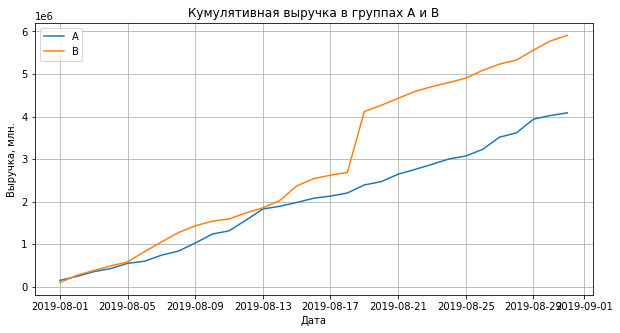

In [8]:
# Массив уникальных пар значений дат и групп теста
date_group = orders[['date','group']].drop_duplicates()

# Агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (
    date_group.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# Агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = (
    date_group.apply(
        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# Объединение кумулятивных данных в одну таблицу
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Переименовывание колонок таблицы
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A
cumulative_rev_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_rev_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Построение графиков выручки по группам
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rev_a['date'].astype('datetime64[D]'), cumulative_rev_a['revenue'], label='A')
plt.plot(cumulative_rev_b['date'].astype('datetime64[D]'), cumulative_rev_b['revenue'], label='B')
plt.legend()
plt.grid(True)
plt.title('Кумулятивная выручка в группах А и В')
plt.ylabel('Выручка, млн.')
plt.xlabel('Дата')
plt.show()

По графикам видно следующее:
1. выручка в обеих группах постепенно растет
2. выручка от группы А растет почти линейно без резких скачков
3. выручка в группе В резко скакнула 18 числа, возможно в этот день было большое количество заказов или были дорогие заказы.

### График кумулятивного среднего чека

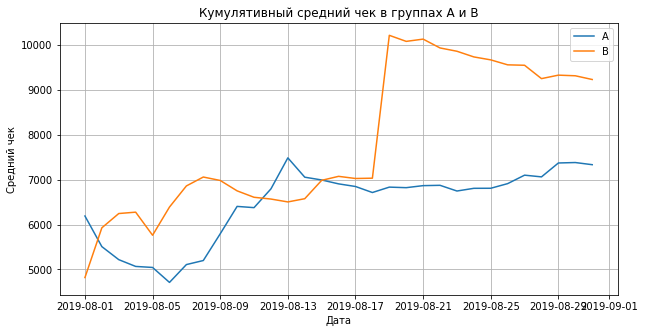

In [9]:
# Построение графиков среднего чека по группам
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rev_a['date'].astype('datetime64[D]'), cumulative_rev_a['revenue']/cumulative_rev_a['orders'], label='A')
plt.plot(cumulative_rev_b['date'].astype('datetime64[D]'), cumulative_rev_b['revenue']/cumulative_rev_b['orders'], label='B')
plt.legend() 
plt.grid(True)
plt.title('Кумулятивный средний чек в группах А и В')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

По графикам видно следующее:
1. в первой половине теста средний чек группы А сильно изменяется, во второй половине значение среднего чека становится более равномерным
2. в первой половине теста средний чек группы В меняется скачкообразно, далее 18 числа произошел сильный скачек за которым следует равномерный спад, вероятнее всего в этот день был совершен заказ на очень крупную сумму

### График относительного изменения кумулятивного среднего чека группы В к А

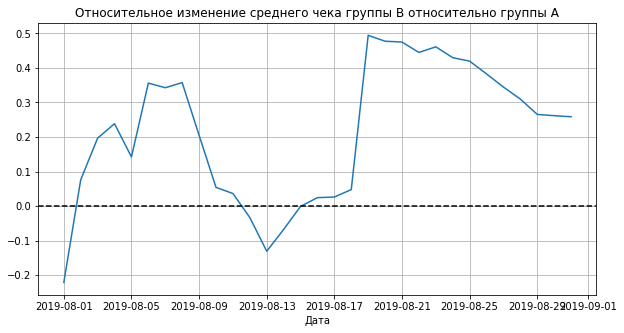

In [10]:
# Создание общей таблицы данных групп А и В
merged_cumulative_rev = cumulative_rev_a.merge(cumulative_rev_b, left_on='date', 
                                               right_on='date', how='left', suffixes=['A', 'B'])

# График отношения средних чеков
plt.figure(figsize=(10, 5))
plt.plot(merged_cumulative_rev['date'].astype('datetime64[D]'), 
         (merged_cumulative_rev['revenueB']/merged_cumulative_rev['ordersB'])/
         (merged_cumulative_rev['revenueA']/merged_cumulative_rev['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid(True)
plt.title('Относительное изменение среднего чека группы B относительно группы A')
plt.xlabel('Дата')
plt.show()

График соответствует картине в пункте 3.2:
1. в первой половине теста два скачка, при этом средний чек в группе В выше
2. в середине теста падение, т.к. в это время средний чек в группе А выше
3. резкий скачек с 18 числа и дальнейшее падение среднего чека группы В

### График кумулятивной конверсии по группам

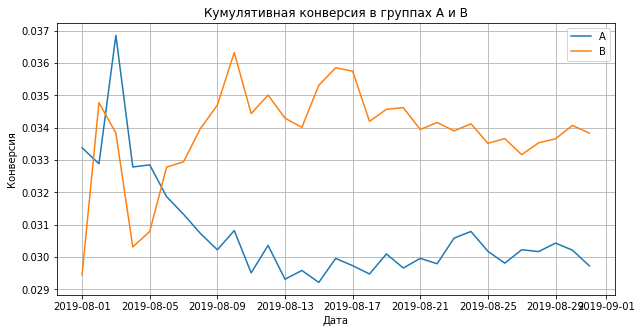

In [11]:
# Расчет кумулятивной конверсии
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# Данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# Данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# Графики кумулятивной конверсии по группам
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_a['date'].astype('datetime64[D]'), cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'].astype('datetime64[D]'), cumulative_data_b['conversion'], label='B')
plt.legend()
plt.grid(True)
plt.title('Кумулятивная конверсия в группах А и В')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.show()

По графикам видно следующее:
1. в начале теста конверсии имеют сопоставимые скачки
2. начиная с 5 числа конверсия группы В выросла и под конец теста колеблется около значения 0.034
3. начиная с 5 числа конверсия группы А просела и под конец теста колеблется около значения 0.030

### График относительного изменения кумулятивной конверсии группы В к А

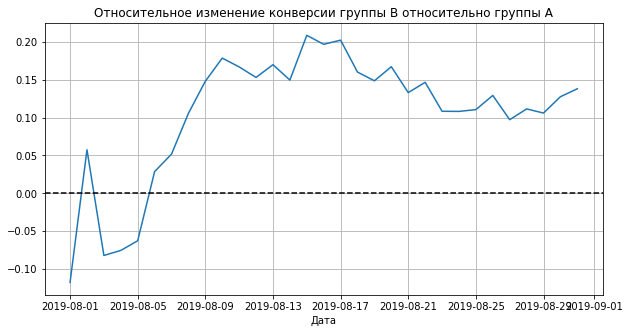

In [12]:
# Создание общей таблицы данных групп А и В
merged_cumulative_con = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                       left_on='date', right_on='date', 
                                                                       how='left', suffixes=['A', 'B'])

# График отношения конверсий
plt.figure(figsize=(10, 5))
plt.plot(merged_cumulative_con['date'].astype('datetime64[D]'), 
         merged_cumulative_con['conversionB']/merged_cumulative_con['conversionA']-1)

plt.grid(True)
plt.title('Относительное изменение конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

По графику видно, что в начале теста конверсия группы В была ниже, чем в группе А (кроме скачка), а затем с 5 числа начала резко расти и под конец теста колеблется на значении 0.13

### График количества заказов по пользователям

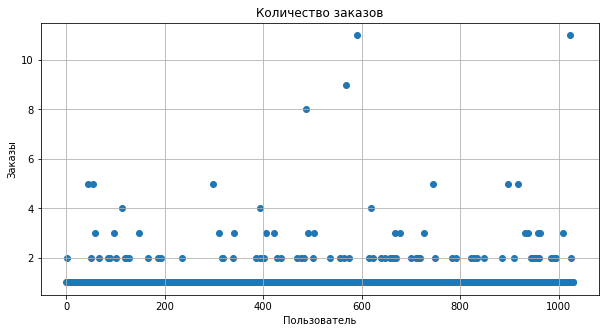

In [13]:
# Данные по заказам пользователей
orders_by_visitors = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique', 'group': 'max'})
)

# Переименовывание колонок таблицы
orders_by_visitors.columns = ['visitor_id', 'orders', 'group']

# Количество пользователей
x_values = pd.Series(range(0,len(orders_by_visitors)))

# Построение графика заказов
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_visitors['orders']) 
plt.grid(True)
plt.title('Количество заказов')
plt.ylabel('Заказы')
plt.xlabel('Пользователь')
plt.show()

Довольно большое количество пользользователей с 2 заказами, стоит посчитать перцентили, чтобы понять являются ли эти значения аномальными или нет

In [14]:
np.percentile(orders_by_visitors['orders'], [90, 95, 99])

array([1., 2., 4.])

Пользователи, которые заказывали более 2 раз относятся к аномальным

### График стоимостей заказов

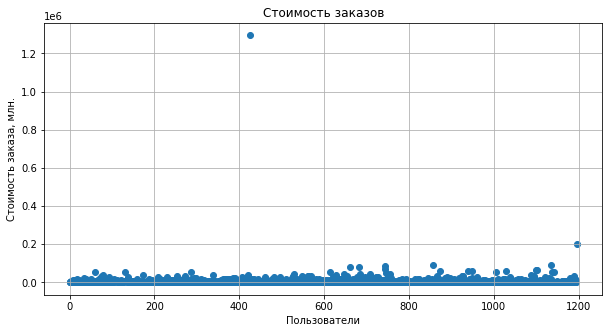

In [15]:
# Количество пользователей
x_values = pd.Series(range(0,len(orders['revenue'])))

# Построение графика заказов
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])
plt.grid(True)
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказа, млн.')
plt.xlabel('Пользователи')
plt.show()

По графику видно, что есть 2 явно выраженных аномальных значения, для определения выборки стоит расчитать перцентили

In [16]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Все заказы, стоимостью выше 28 тыс. относятся к аномальным

### Расчет статистической значимости различий в конверсии по "сырым" данным

Нулевая гипотеза: различий в конверсии между группами нет. <br>
Альтернативная гипотеза: различия в конверсии между группами есть.<br>
Для проверки гипотез воспользуемся тестом Манна-Уитни, при этом p-value = 0.05

In [17]:
# Заказы пользователей разбитые по группам
orders_by_visitors_a = orders_by_visitors[orders_by_visitors['group'] == 'A']
orders_by_visitors_b = orders_by_visitors[orders_by_visitors['group'] == 'B']

# Данные со всеми заказами пользователей
sample_a = pd.concat(
    [
        orders_by_visitors_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulative_rev_a['orders'].sum() - len(orders_by_visitors_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
       orders_by_visitors_b['orders'],
        pd.Series(
            0,
            index=np.arange(
               cumulative_rev_b['orders'].sum() - len(orders_by_visitors_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.012
0.374


По сырым данным p-value ниже чем порог статистической значимости 0.05, значит нулевую гипотезу о статистически значимых различий в конверсии между группами можно отвергнуть.

### Расчет статистической значимости различий в среднем чеке по "сырым" данным

Нулевая гипотеза: различий в среднем чеке между группами нет.<br> 
Альтернативная гипотеза: различия в среднем чеке между группами есть.<br>
Для проверки гипотез воспользуемся тестом Манна-Уитни, при этом p-value = 0.05

In [18]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


По сырым данным p-value намного выше чем порог статистической значимости 0.05, значит нулевая гипотеза о статистически значимых различий в среднем чеке между группами не отвергается.

### Расчет статистической значимости различий в конверсии по "очищенным" данным

In [19]:
# Выделение аномальных значений
anomaly_orders = pd.concat(
    [
        orders_by_visitors[np.logical_and(orders_by_visitors['group'] == 'A', orders_by_visitors['orders'] > 2)]['visitor_id'],
        orders_by_visitors[np.logical_and(orders_by_visitors['group'] == 'B', orders_by_visitors['orders'] > 2)]['visitor_id'],
    ],
    axis=0,
)
anomaly_expensive = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = (
    pd.concat([anomaly_orders, anomaly_expensive], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [20]:
# Отфильтрованныве данные со всеми заказами пользователей
sample_a_filtered = pd.concat(
    [
        orders_by_visitors_a[
            np.logical_not(orders_by_visitors_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
               cumulative_rev_a['orders'].sum() - len(orders_by_visitors_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_visitors_b[
            np.logical_not(orders_by_visitors_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
               cumulative_rev_b['orders'].sum() - len(orders_by_visitors_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

0.067
0.184


По очищенным данным p-value выше чем порог статистической значимости 0.05, значит нулевая гипотеза о статистически значимых различий в конверсии между группами не отвергается.

### Расчет статистической значимости различий в среднем чеке по "очищенным" данным

In [21]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.753
-0.022


По очищенным данным p-value выше чем порог статистической значимости 0.05, значит нулевая гипотеза о статистически значимых различий в среднем чеке между группами не отвергается.

## Подведение итогов
### Общий вывод по работе

**Конверсия**
1. Конверсия "сырых" данных имеет статистически значимое отличие (p-value = 0.012).
2. Конверсия "очищенных" данных не имеет статистически значимого отличия (p-value = 0.067).
3. По графику относительного изменения конверсии группы В к А можно сказать, что группа В на 15% лучше конвертируется чем группа А.

**Средний чек**
1. Средний чек "сырых" данных не имеет статистически значимое отличие (p-value = 0.729).
2. Средний чек "очищенных" данных не имеет статистически значимого отличия (p-value = 0.753).
3. По графику относительного изменения среднего чека группы В к А можно сказать, что средний чек группы В лучше (из-за аномально дорогого заказа), но значение падает.

Стоит остановить тест и признать его упешным для группы В, т.к. в этой группе конверсия выше на 15%.